<a href="https://colab.research.google.com/github/karthika1498/Random_Forest/blob/main/Assignment_random_forest(company).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random Forest
 
# Assignment


-About the data: 

Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
- Sales -- Unit sales (in thousands) at each location
- Competitor Price -- Price charged by competitor at each location
- Income -- Community income level (in thousands of dollars)
- Advertising -- Local advertising budget for company at each location (in thousands of dollars)
- Population -- Population size in region (in thousands)
- Price -- Price company charges for car seats at each site
- Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
- Age -- Average age of the local population
- Education -- Education level at each location
- Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
-  US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
- Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data (1).csv to Company_Data (1).csv


In [ ]:
company=pd.read_csv("Company_Data (1).csv")
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
company.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [ ]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
company.shape

(400, 11)

In [ ]:
company.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [ ]:
company.ShelveLoc.value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [ ]:
company.Urban.value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [ ]:
company.US.value_counts()

Yes    258
No     142
Name: US, dtype: int64

feature engineering

<Axes: xlabel='Sales', ylabel='Count'>

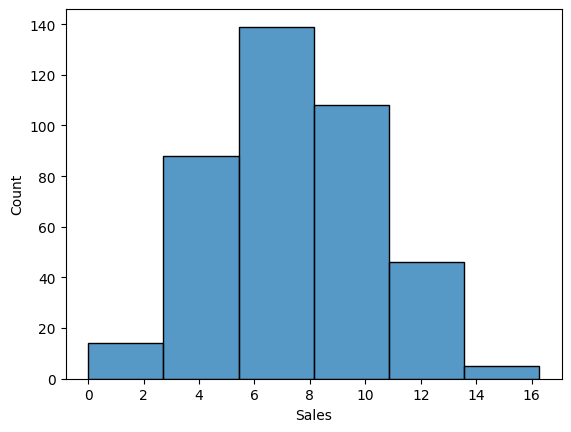

In [ ]:
sns.histplot(company["Sales"],bins=6)

In [ ]:
company.Sales.max()

16.27

In [ ]:
company.Sales.min()

0.0

In [ ]:
company.Sales.max()/3

5.423333333333333

In [ ]:
company1=company.copy()
company1["sub_category"]=pd.cut(x=company1.Sales,bins=[0,5.5,11,17],labels=["low","medium","high"],right=False)

In [ ]:
company1.drop(["Sales"],inplace=True,axis=1)
company1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sub_category
0,138,73,11,276,120,Bad,42,17,Yes,Yes,medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,113,35,10,269,80,Medium,59,12,Yes,Yes,medium
3,117,100,4,466,97,Medium,55,14,Yes,Yes,medium
4,141,64,3,340,128,Bad,38,13,Yes,No,low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,high
396,139,23,3,37,120,Medium,55,11,No,Yes,medium
397,162,26,12,368,159,Medium,40,18,Yes,Yes,medium
398,100,79,7,284,95,Bad,50,12,Yes,Yes,medium


In [ ]:
company1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   CompPrice     400 non-null    int64   
 1   Income        400 non-null    int64   
 2   Advertising   400 non-null    int64   
 3   Population    400 non-null    int64   
 4   Price         400 non-null    int64   
 5   ShelveLoc     400 non-null    object  
 6   Age           400 non-null    int64   
 7   Education     400 non-null    int64   
 8   Urban         400 non-null    object  
 9   US            400 non-null    object  
 10  sub_category  400 non-null    category
dtypes: category(1), int64(7), object(3)
memory usage: 31.9+ KB


In [ ]:
company1["sub_category"]=company1.sub_category.astype(str)

In [ ]:
categorical_feature=[feature for feature in company1.columns if company1[feature].dtype=="O"]
categorical_feature

['ShelveLoc', 'Urban', 'US', 'sub_category']

In [ ]:
numerical_feature=[feature for feature in company1.columns if company1[feature].dtype!="O"]
numerical_feature

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education']

In [ ]:
company1.sub_category.value_counts()

medium    248
low       103
high       49
Name: sub_category, dtype: int64

- visualization

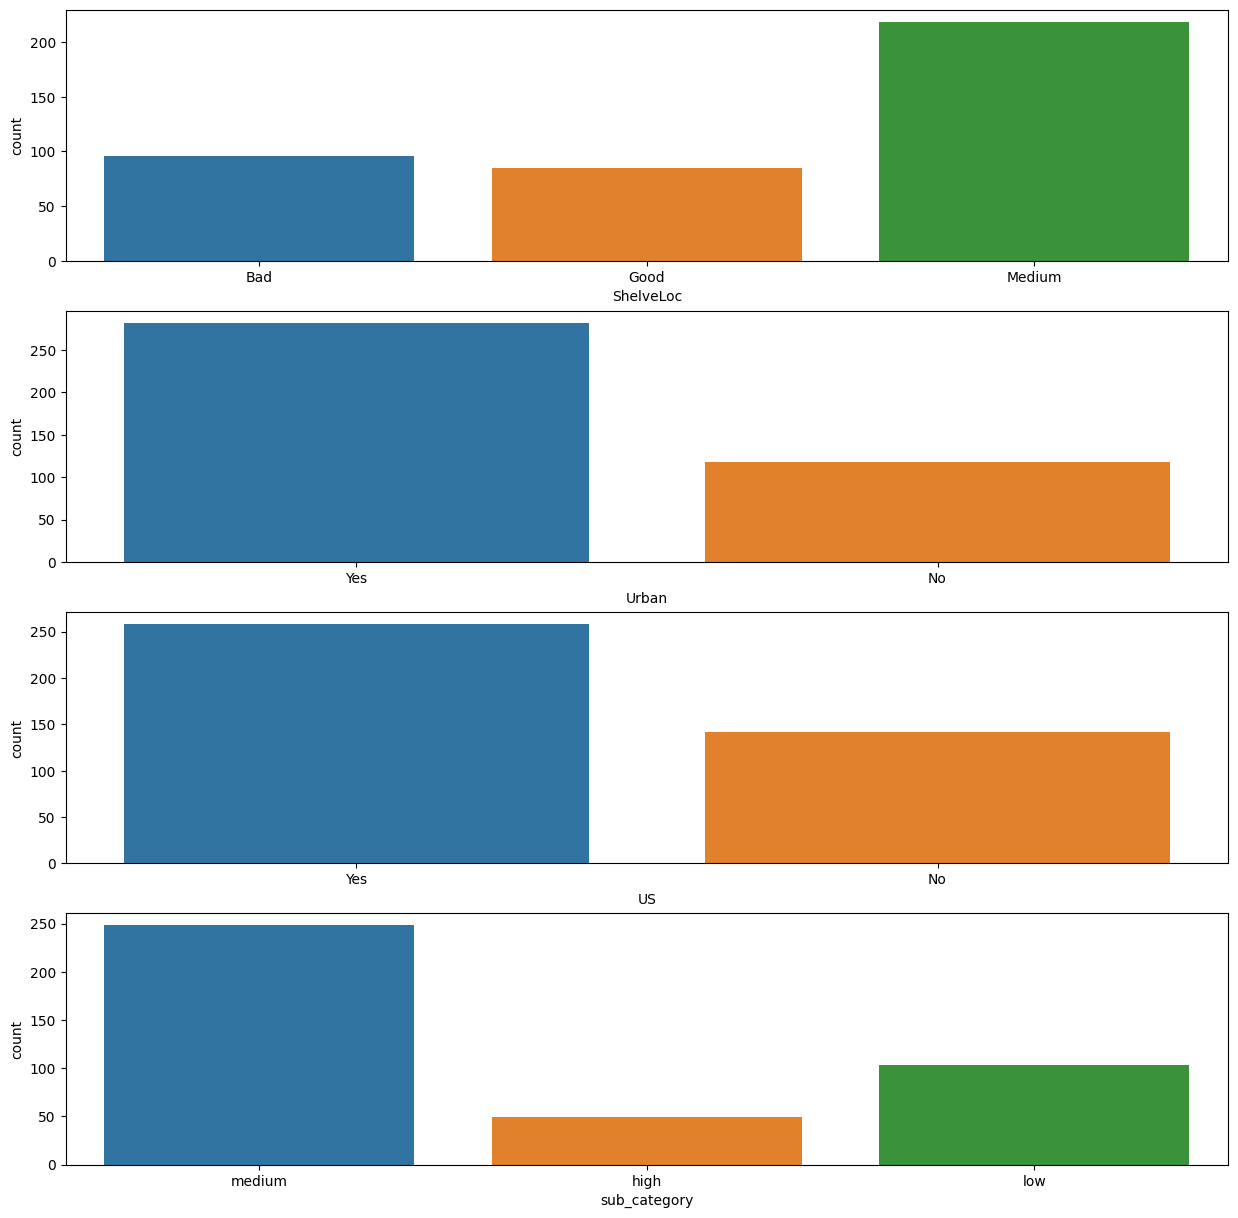

In [ ]:
fig,ax=plt.subplots(len(categorical_feature),1,figsize=(15,15))

for i in range(0,len(categorical_feature)):
  sns.countplot(x=categorical_feature[i],ax=ax[i],data=company1)

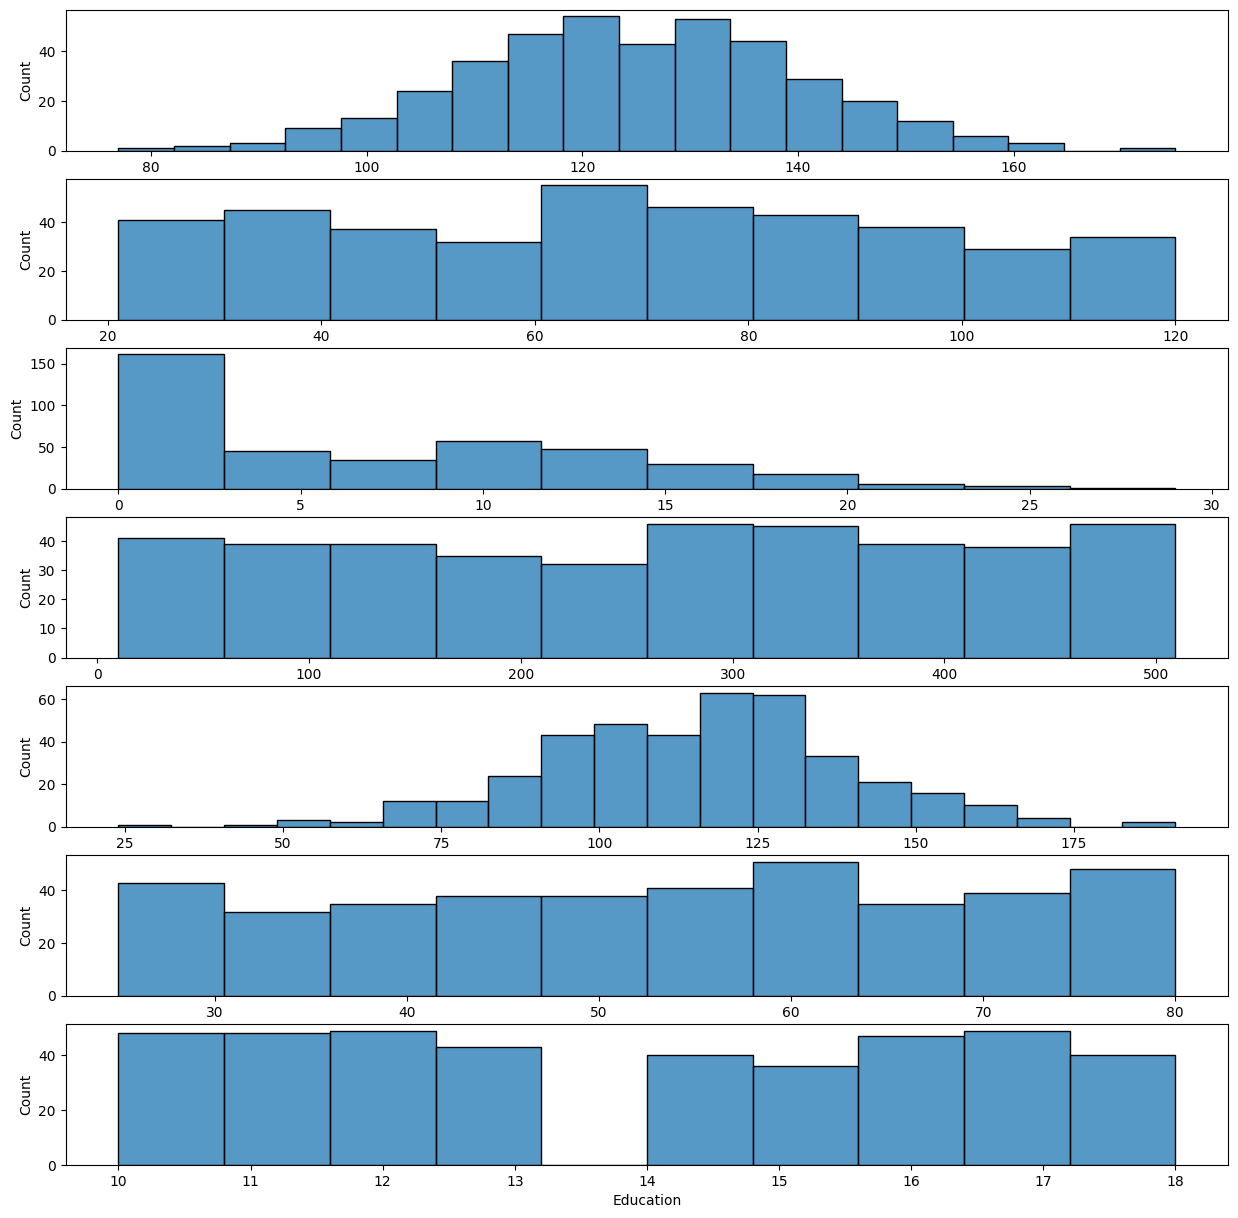

In [ ]:
fig,ax=plt.subplots(len(numerical_feature),1,figsize=(15,15))

for i in range(0,len(numerical_feature)):
  sns.histplot(x=numerical_feature[i],ax=ax[i],data=company1)

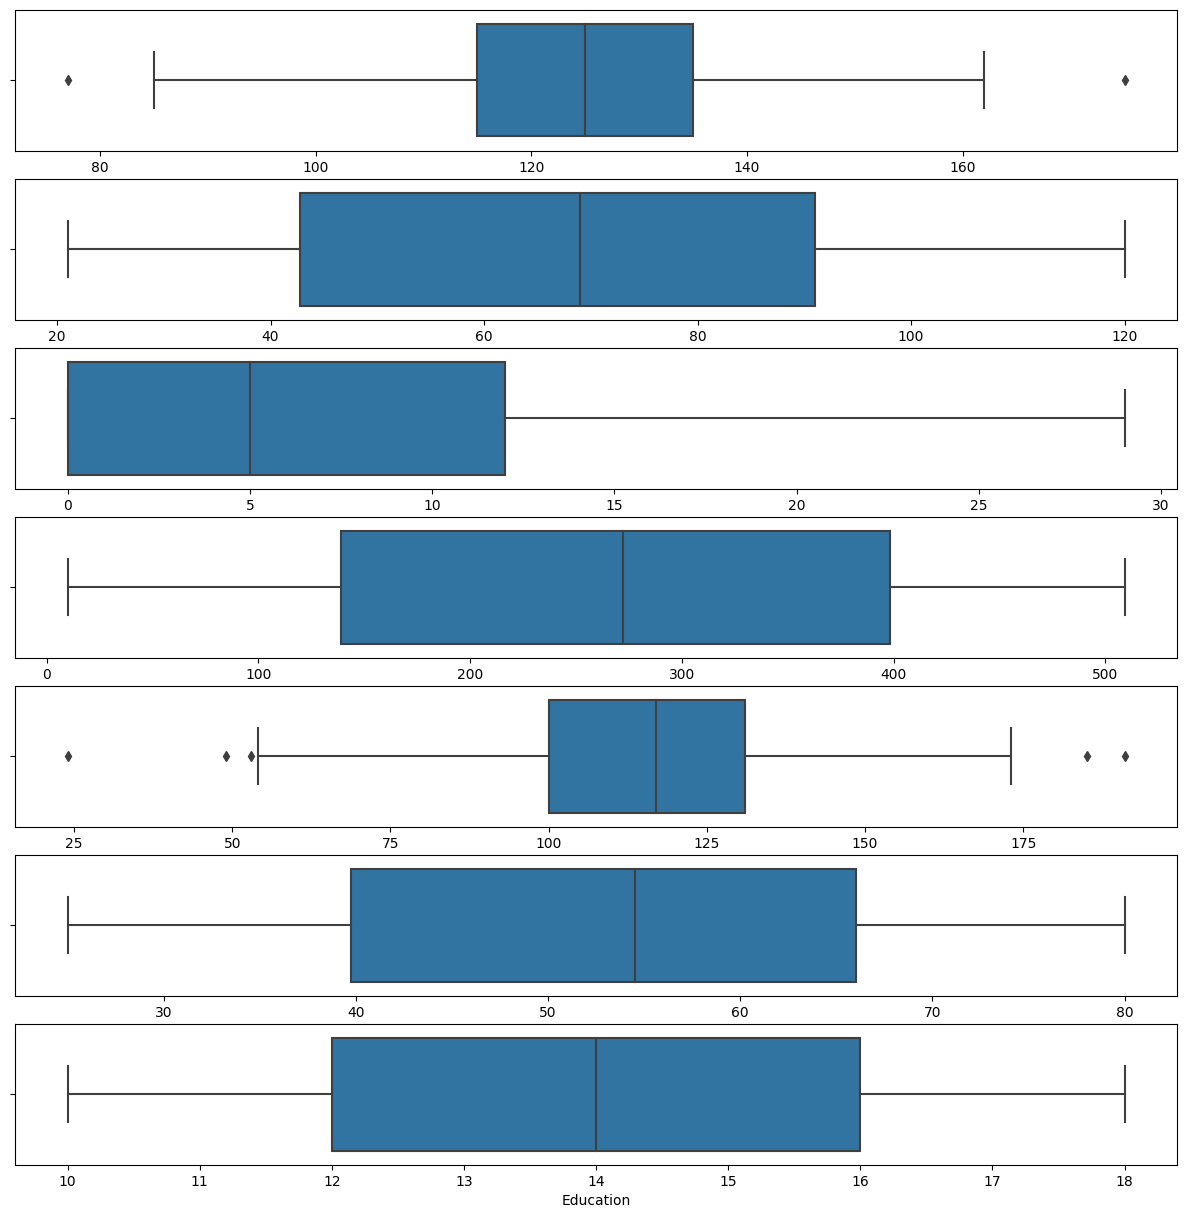

In [ ]:
fig,ax=plt.subplots(len(numerical_feature),1,figsize=(15,15))

for i in range(0,len(numerical_feature)):
  sns.boxplot(x=numerical_feature[i],ax=ax[i],data=company1)

In [ ]:
company2 = company1.copy()

for feature in numerical_feature:
    Q1,Q3 = np.percentile(company1[feature], [25,75])
    IQR = Q3 - Q1
    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR
    outliers = company1[feature][(company1[feature] < ll) |  (company1[feature] > ul)]
    
    company2=company2.drop(outliers.index[:] , errors="ignore")
    
    outliers=0 

In [ ]:
print(company.shape)
print(company2.shape)

(400, 11)
(394, 11)


data preprocessing

In [ ]:
x=company2.drop(["sub_category"],axis=1)
y=company2["sub_category"]

In [ ]:
print(x)
print(y)

     CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0          138      73           11         276    120       Bad   42   
1          111      48           16         260     83      Good   65   
2          113      35           10         269     80    Medium   59   
3          117     100            4         466     97    Medium   55   
4          141      64            3         340    128       Bad   38   
..         ...     ...          ...         ...    ...       ...  ...   
395        138     108           17         203    128      Good   33   
396        139      23            3          37    120    Medium   55   
397        162      26           12         368    159    Medium   40   
398        100      79            7         284     95       Bad   50   
399        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3          

In [ ]:
x=pd.get_dummies(x)

In [ ]:
encoder=LabelEncoder()
encoder.fit_transform(y)

array([2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 1, 1,
       1, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 0, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2,
       2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0,

- featutre selection

In [ ]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2 
     

In [ ]:
test=SelectKBest(score_func=chi2,k=4)
fit=test.fit(x,y)

In [ ]:
scores = fit.scores_
features = fit.transform(x) 
     

In [ ]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df 
     

,Score,Feature
4,208.054983,Price
2,136.853810,Advertising
5,98.820931,Age
8,73.257684,ShelveLoc_Good
1,52.351760,Income
7,47.776587,ShelveLoc_Bad
3,27.657789,Population
9,13.260983,ShelveLoc_Medium
12,7.245057,US_No
0,5.019311,CompPrice


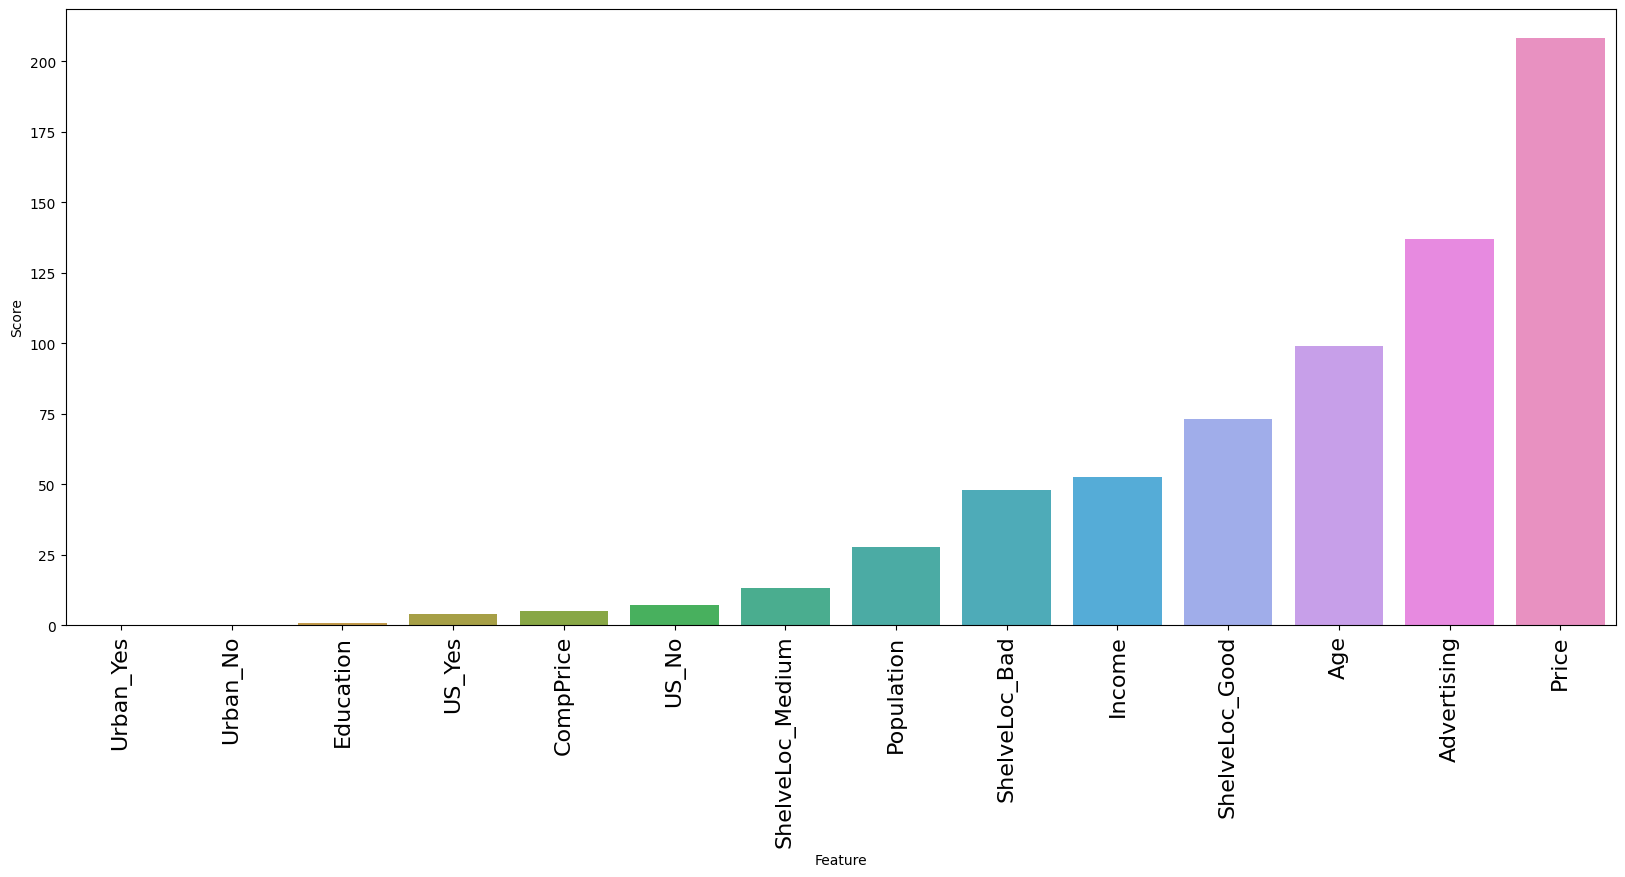

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='Feature', y="Score", data=score_df, order=score_df.sort_values('Score').Feature) 
plt.xticks(rotation = 90, fontsize = 16)
plt.show()

In [ ]:
model_data_x = x[['Price','Advertising','Population','Income','Age','ShelveLoc_Good','ShelveLoc_Bad',
                  'ShelveLoc_Medium', 'US_No','CompPrice']]

In [ ]:
model_data_x

,Price,Advertising,Population,Income,Age,ShelveLoc_Good,ShelveLoc_Bad,ShelveLoc_Medium,US_No,CompPrice
0,120,11,276,73,42,0,1,0,0,138
1,83,16,260,48,65,1,0,0,0,111
2,80,10,269,35,59,0,0,1,0,113
3,97,4,466,100,55,0,0,1,0,117
4,128,3,340,64,38,0,1,0,1,141
...,...,...,...,...,...,...,...,...,...,...
395,128,17,203,108,33,1,0,0,0,138
396,120,3,37,23,55,0,0,1,0,139
397,159,12,368,26,40,0,0,1,0,162
398,95,7,284,79,50,0,1,0,0,100


In [ ]:
model_data_y=y
model_data_y

0      medium
1        high
2      medium
3      medium
4         low
        ...  
395      high
396    medium
397    medium
398    medium
399    medium
Name: sub_category, Length: 394, dtype: object

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(model_data_x, model_data_y, test_size=0.2,random_state=40)

model building

In [ ]:
# Bagged Decision Trees for Classification
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 

In [ ]:
kfold=KFold(n_splits=10,random_state=7,shuffle=True)
cart=DecisionTreeClassifier()
num_tree=100

model=BaggingClassifier(estimator=cart,n_estimators=num_tree,random_state=7)
result=cross_val_score(model,model_data_x,model_data_y,cv=kfold)

In [ ]:
print(result.mean())

0.7486538461538461


In [ ]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
kfold=KFold(n_splits=10,random_state=10,shuffle=True)
num_tree=100
max_feature=5
model=RandomForestClassifier(n_estimators=num_tree,max_features=max_feature)
result=cross_val_score(model,model_data_x,model_data_y,cv=kfold)
print(result.mean())

0.7211538461538461


- using grid search hyper parameter tuning

In [ ]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

param_dict = { 
    "criterion":["gini","entropy"],
    'n_estimators':[10,25,50,75,100,125,150],
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200]   
}

rf = RandomForestClassifier(random_state=7)

grid = GridSearchCV(rf, param_grid=param_dict, cv=kfold)
grid.fit(model_data_x, model_data_y) 

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
             estimator=RandomForestClassifier(random_state=7),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 75, 100, 125, 150]})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)  

0.7335897435897436
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 25}


In [ ]:
model_kf =grid.best_estimator_
model_kf.fit(model_data_x, model_data_y)

results = cross_val_score(model_kf, model_data_x, model_data_y, cv=kfold)
print('Accuracy with k fold validation', np.round(results.mean(),3))  
     

Accuracy with k fold validation 0.734


In [ ]:
#ada boost classification
from sklearn.ensemble import AdaBoostClassifier
kfold=KFold(n_splits=5,random_state=7,shuffle=True)
model=AdaBoostClassifier(n_estimators=100,random_state=7)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7563777994157741
